Correlación en B3:
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.950134
VIVTOT2020    0.950134    1.000000


Correlación en A1:
            POPTOT2020  VIVTOT2020
POPTOT2020     1.00000     0.95161
VIVTOT2020     0.95161     1.00000


Correlación en A3:
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.927071
VIVTOT2020    0.927071    1.000000


Correlación en A2:
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.956923
VIVTOT2020    0.956923    1.000000


Correlación en B2:
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.929456
VIVTOT2020    0.929456    1.000000


Correlación en B3':
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.737964
VIVTOT2020    0.737964    1.000000


Correlación en B1:
            POPTOT2020  VIVTOT2020
POPTOT2020    1.000000    0.765981
VIVTOT2020    0.765981    1.000000


Correlación en DH:
            POPTOT2020  VIVTOT2020
POPTOT2020         NaN         NaN
VIVTOT2020         NaN      

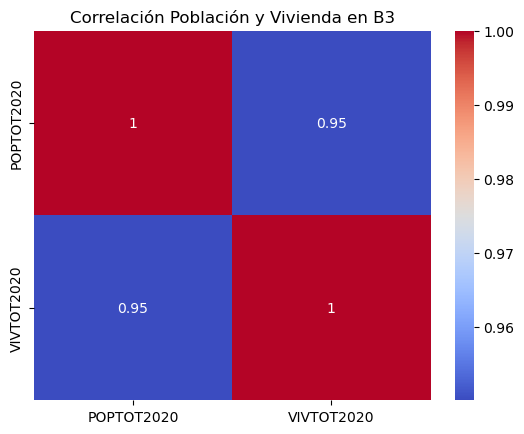

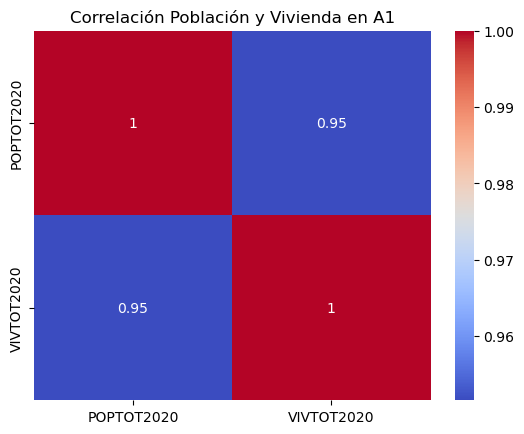

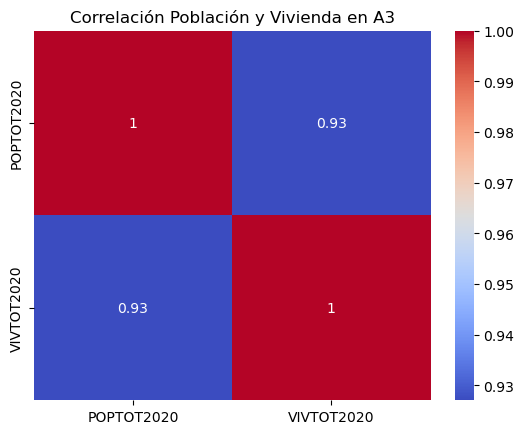

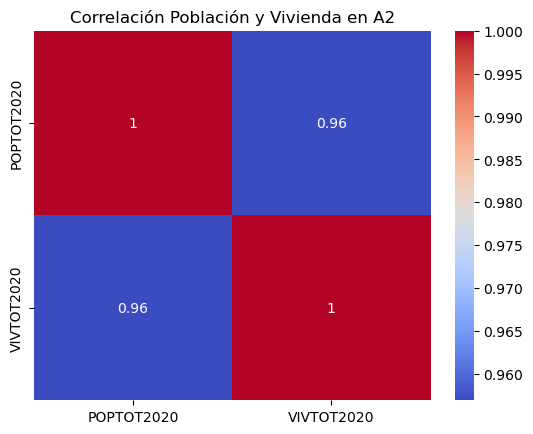

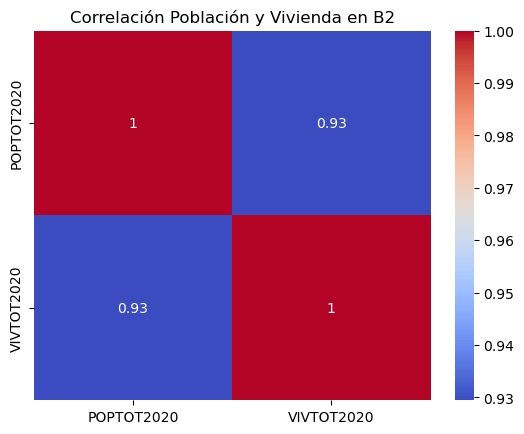

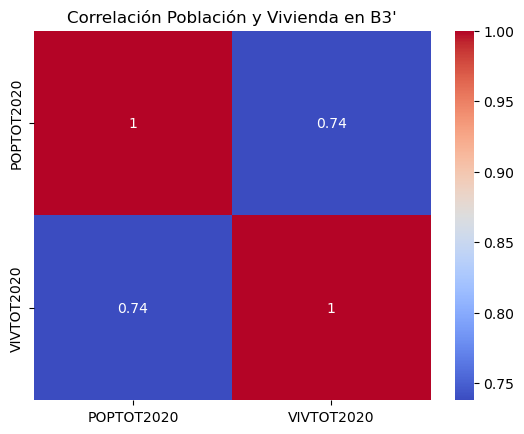

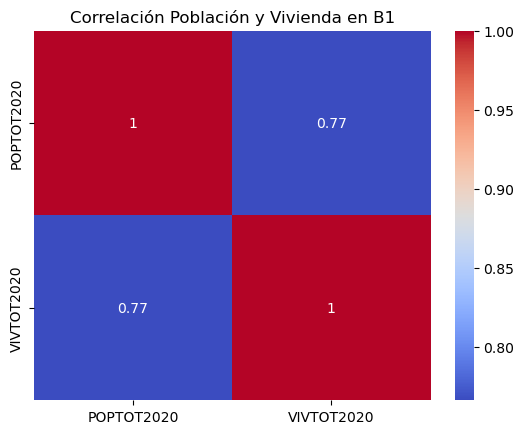

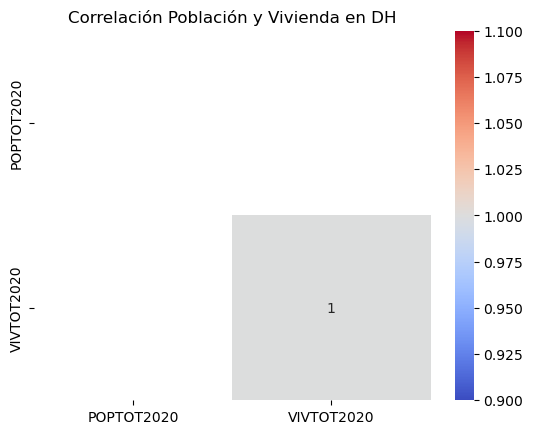

In [3]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de manzanas
MAPA_ruta = r"Z:\VOCES\DATA\Tratados\NAC\INT_MZN_NAC\Mzn_Tipologías_NAC_ImpEq.gpkg"

MAPA_df = gpd.read_file(MAPA_ruta, layer='Mzn_Subtipologias_UeEq_filtrado')

# Separar por Tipología
tipologias = MAPA_df['TIPOLOGIA'].unique()

# Diccionario para almacenar resultados
correlaciones = {}

# Calcular correlación para cada tipología
for tipologia in tipologias:
    df_tipologia = MAPA_df[MAPA_df['TIPOLOGIA'] == tipologia]
    correlacion = df_tipologia[['POPTOT2020', 'VIVTOT2020']].corr(method='pearson')
    correlaciones[tipologia] = correlacion
    print(f"Correlación en {tipologia}:")
    print(correlacion)
    print("\n")

# Visualizar correlaciones como mapa de calor para cada tipología
for tipologia, correlacion in correlaciones.items():
    sns.heatmap(correlacion, annot=True, cmap='coolwarm')
    plt.title(f'Correlación Población y Vivienda en {tipologia}')
    plt.show()


In [4]:
import statsmodels.api as sm

# Realizar regresión lineal para cada tipología
for tipologia in tipologias:
    df_tipologia = MAPA_df[MAPA_df['TIPOLOGIA'] == tipologia]
    
    # Variables independiente y dependiente
    X = df_tipologia['VIVTOT2020']
    y = df_tipologia['POPTOT2020']
    
    # Añadir constante para el intercepto
    X = sm.add_constant(X)
    
    # Ajustar el modelo
    model = sm.OLS(y, X).fit()
    
    # Mostrar resumen
    print(f"Resultados de Regresión en {tipologia}:")
    print(model.summary())
    print("\n")


Resultados de Regresión en B3:
                            OLS Regression Results                            
Dep. Variable:             POPTOT2020   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.065e+06
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:26:39   Log-Likelihood:            -1.1799e+06
No. Observations:              222489   AIC:                         2.360e+06
Df Residuals:                  222487   BIC:                         2.360e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0475

C:\Users\AMIM GTAC\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\AMIM GTAC\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1872: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
C:\Users\AMIM GTAC\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\AMIM GTAC\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [5]:
import statsmodels.formula.api as smf

# Modelo ANOVA
modelo_anova = smf.ols('POPTOT2020 ~ TIPOLOGIA + VIVTOT2020', data=MAPA_df).fit()

# Tabla ANOVA
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)


Resultados del ANOVA:
                  sum_sq        df             F  PR(>F)
TIPOLOGIA   5.910304e+07       7.0  3.427692e+03     0.0
VIVTOT2020  9.643900e+09       1.0  3.915099e+06     0.0
Residual    2.311214e+09  938275.0           NaN     NaN


In [6]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Especificar el modelo multinivel (usamos TIPOLOGIA como nivel jerárquico)
# Población es la variable dependiente, Vivienda es la independiente
modelo_ml = MixedLM(MAPA_df['POPTOT2020'], MAPA_df[['VIVTOT2020']], groups=MAPA_df['TIPOLOGIA'])
modelo_ml_fit = modelo_ml.fit()

# Mostrar resumen
print("Resultados del Modelo de Regresión Multinivel:")
print(modelo_ml_fit.summary())


Resultados del Modelo de Regresión Multinivel:
           Mixed Linear Model Regression Results
Model:            MixedLM  Dependent Variable: POPTOT2020   
No. Observations: 938284   Method:             REML         
No. Groups:       8        Scale:              2463.2396    
Min. group size:  15774    Log-Likelihood:     -4995057.1454
Max. group size:  222489   Converged:          Yes          
Mean group size:  117285.5                                  
------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------------
VIVTOT2020       2.423    0.001 1978.674 0.000  2.421  2.426
Group Var     2463.240                                      



C:\Users\AMIM GTAC\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
